# Basic basic basic Matplotlib

* [Very short video](https://www.youtube.com/watch?v=SiCyTcudoSE) 

* [Pyplot tutorial](https://matplotlib.org/1.4.2/users/pyplot_tutorial.html); includes a list of options for line charts. 

* [Text properties and layout](https://matplotlib.org/1.4.2/users/text_props.html)

* [Matplotlib colors](https://matplotlib.org/2.0.2/api/colors_api.html)

* [List of named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# create some simple data
year = [1950, 1970, 1990, 2010]
population = [2.519, 3.692, 5.263, 6.972]

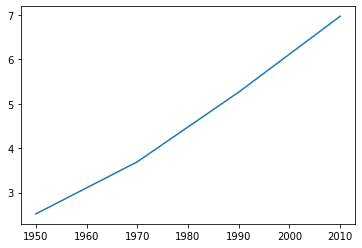

In [3]:
# draw a plot
# x axis first, y axis second 
plt.plot(year, population)

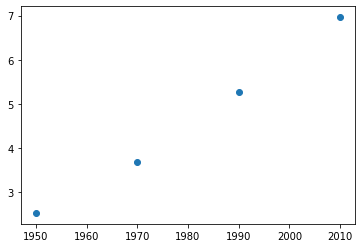

In [4]:
# scatterplot 
# x axis first, y axis second 
plt.scatter(year, population)

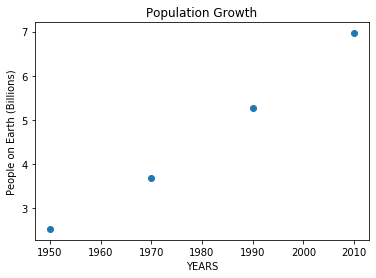

In [5]:
# add labels to x and y axis
plt.ylabel('People on Earth (Billions)')
plt.xlabel('YEARS')

# title above chart
plt.title('Population Growth')

plt.scatter(year, population)

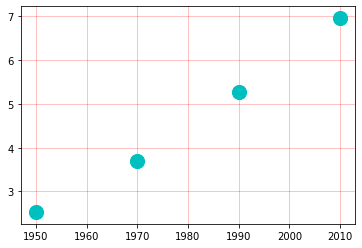

In [6]:
# add gridlines
# zorder used to put grid behind dots
# basic colors are rgb (red, green, blue) and cmyk (cyan, magenta, yellow, black)
# alpha sets transparency

fig, ax = plt.subplots()
ax.grid(zorder=0, color='r', alpha=0.3)

# to make dots larger in scatterplot, use s=number
plt.scatter(year, population, zorder=3, color='c', s=200)


See this [insanely detailed StackOverflow post](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size#targetText=The%20standard%20size%20of%20points,is%20hence%201%2F72%20inches.) for more info about markers and dots in Matplotlib plots. 

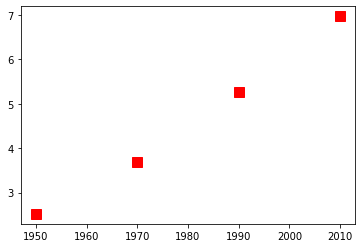

In [7]:
# here 'rs' means 'red square' and ms= sets the marker size
plt.plot(year, population, 'rs', ms=10)

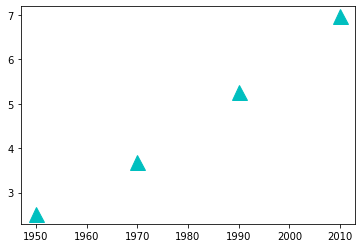

In [8]:
# here 'c^' means 'cyan triangle' and ms= sets the marker size
plt.plot(year, population, 'c^', ms=15)

## Import a CSV and plot a dataframe

In [3]:
# now some pandas work to get data to be plotted 
# plot 4 countries' GDP per capita using a (tiny) CSV 

# import CSV 
df = pd.read_csv('../data/gdp_data_sm.csv')

# how many rows, columns?
df.shape

(4, 5)

In [10]:
# show first 5 rows (there are only 4)
df.head()

,country,1960,1980,2000,2018
0,China,192.285058,347.120088,1767.833627,7754.962119
1,India,330.205293,422.903804,826.592425,2104.163292
2,Japan,8607.657082,25854.575020,42169.733280,48919.560890
3,United States,17550.573160,28589.672730,44726.965400,54541.720520


[Data source](https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#) (World Bank)

In [11]:
# change the index column 
df = df.set_index('country')

In [12]:
df.head()

,1960,1980,2000,2018
country,,,,
China,192.285058,347.120088,1767.833627,7754.962119
India,330.205293,422.903804,826.592425,2104.163292
Japan,8607.657082,25854.575020,42169.733280,48919.560890
United States,17550.573160,28589.672730,44726.965400,54541.720520


In [13]:
# note, the index does not count as a "column" 
df.columns

Index(['1960', '1980', '2000', '2018'], dtype='object')

In [14]:
# check to see whether all values are floats
df.dtypes

1960    float64
1980    float64
2000    float64
2018    float64
dtype: object

In [15]:
# apply a function to divide every value by 1000 before plotting; limit decimal places to 2 
# note, all columns must be numeric for this to work 
df = df.apply( lambda val: round( (val / 1000), 2 ) )

In [16]:
df.head()

,1960,1980,2000,2018
country,,,,
China,0.19,0.35,1.77,7.75
India,0.33,0.42,0.83,2.10
Japan,8.61,25.85,42.17,48.92
United States,17.55,28.59,44.73,54.54


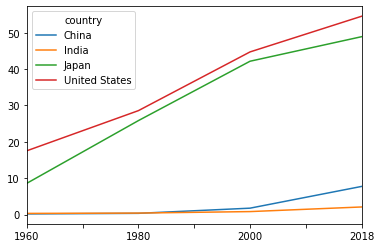

In [17]:
# ready to plot! 
# simpler than you might think - see below for what T does
df.T.plot()

In [18]:
# T transforms the table, making a simple plot possible
# plot() wants to plot COLUMNS as lines 
df.T

country,China,India,Japan,United States
1960,0.19,0.33,8.61,17.55
1980,0.35,0.42,25.85,28.59
2000,1.77,0.83,42.17,44.73
2018,7.75,2.10,48.92,54.54


## Make some enhancements to the chart

Text(0, 0.5, 'Thousands (US 2010 dollars)')

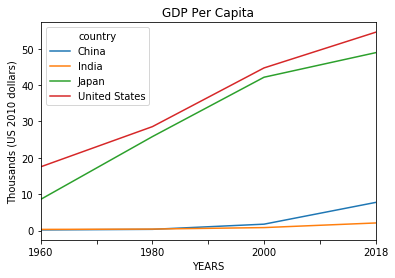

In [19]:
# create chart with title above chart
ax = df.T.plot(title='GDP Per Capita')

# add labels to x and y axis
ax.set_xlabel('YEARS')
ax.set_ylabel('Thousands (US 2010 dollars)')


<Figure size 432x288 with 0 Axes>

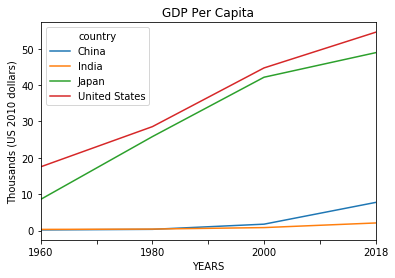

In [20]:
# alternative code, same chart
plt.figure()
df.T.plot(title='GDP Per Capita')
plt.xlabel('YEARS')
plt.ylabel('Thousands (US 2010 dollars)')
plt.show()

<Figure size 432x288 with 0 Axes>

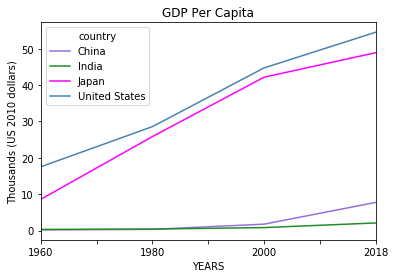

In [21]:
# change the color palette 
colors=['mediumpurple', 'forestgreen', 'magenta', 'steelblue']

plt.figure()
df.T.plot(title='GDP Per Capita', color=colors)
plt.xlabel('YEARS')
plt.ylabel('Thousands (US 2010 dollars)')
plt.show()

<Figure size 432x288 with 0 Axes>

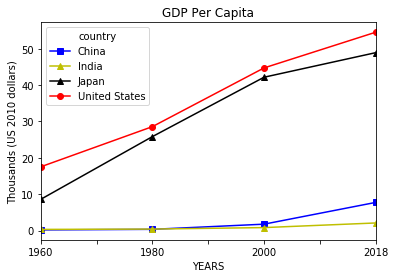

In [22]:
# change the line styles
styles = ['bs-', 'y^-', 'k^-', 'ro-']

plt.figure()
df.T.plot(title='GDP Per Capita', style=styles)
plt.xlabel('YEARS')
plt.ylabel('Thousands (US 2010 dollars)')
plt.show()